In [1]:
import pandas as pd
df = pd.read_excel("/content/wsj2021_ticker_added.xlsx")

In [2]:

df_new=df[["title","content"]]
#print(df_new)
df_new["title_content"]=df_new["title"]+" "+df_new["content"]
df_total=df_new.drop(["title","content"],axis=1)
df_total=df_total['title_content'].astype(str)
#print(df_total[2])

<ipython-input-2-c8aa0e33ce0b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new["title_content"]=df_new["title"]+" "+df_new["content"]


In [3]:
!pip install bertopic

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.4/143.4 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 71.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.8/90.8 kB 11.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 8.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached Cython-0.29.36-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl (1.9 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 106.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 76.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 34.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 86.3 MB/s eta 0:00:00
  Preparing metadata

In [4]:
import numpy as np
from bertopic import BERTopic
from sentence_transformers import SentenceTransformer

# Pre-calculate embeddings
embedding_model = SentenceTransformer("paraphrase-MiniLM-L6-v2")

# Encode the text_column
embeddings = embedding_model.encode(df_total, show_progress_bar=True)

# Initialize BERTopic
topic_model = BERTopic(embedding_model=embedding_model, verbose=True)

# Fit the model
topics, _ = topic_model.fit_transform(df_total, embeddings)

# Add the topics to the DataFrame
df['topics'] = topics


Batches:   0%|          | 0/972 [00:00<?, ?it/s]

2023-10-20 17:00:44,683 - BERTopic - Reduced dimensionality
2023-10-20 17:00:48,525 - BERTopic - Clustered reduced embeddings


In [5]:
topics = topic_model.get_topics()

# Print the top keywords for each topic
for topic_id, keywords_list in topics.items():
    keywords = [keyword for keyword, weight in keywords_list]
    print(f"Topic {topic_id}: {', '.join(keywords)}")

Topic -1: the, and, of, to, in, that, for, is, it, as
Topic 0: nan, , , , , , , , , 
Topic 1: taliban, afghanistan, afghan, kabul, case, react, afghans, typeof, charcodeat, break
Topic 2: books, custom_1600x1066, review, book, her, sameas, obj, read, his, novel
Topic 3: students, school, schools, education, teachers, learning, parents, district, student, districts
Topic 4: cfo, chief, company, options, newsletter, officer, key, value, finance, decorators
Topic 5: im, images, net, https, caption, imphotoid, softcrop, responsiveimage, imagesrc, pg
Topic 6: broadway, film, theatre, opera, theater, review, movie, his, is, show
Topic 7: biden, president, mr, house, his, democrats, trump, plan, infrastructure, white
Topic 8: premarket, null, colorindex, 01, 2021, 12, 21, 11, 07, 2020
Topic 9: album, music, ac, song, songs, pop, band, rock, guitar, singer
Topic 10: art, museum, origami, artist, exhibition, sub_type, json, painting, hide, deleted
Topic 11: black, race, tulsa, theory, greenwood

In [6]:
topic_model.get_topic_freq().head(11)

Topic  Count
1       -1  10984
7        0   1198
66       1    440
125      2    349
8        3    328
62       4    294
106      5    236
134      6    223
9        7    220
73       8    206
53       9    190

In [7]:
topic_model.get_topic(9)

[('album', 0.018726353251578634),
 ('music', 0.018202458114696705),
 ('ac', 0.01201219869930188),
 ('song', 0.01102580022361686),
 ('songs', 0.009868081069010451),
 ('pop', 0.007298326223112575),
 ('band', 0.006672704675908584),
 ('rock', 0.006638429377393689),
 ('guitar', 0.006303269727707087),
 ('singer', 0.006190282644821708)]

In [8]:
!pip install bertopic[visualization]

In [9]:
topic_model.visualize_topics()

In [10]:
topics = topic_model.get_topics()

# Create an empty DataFrame
topics_df = pd.DataFrame(columns=['Topic_ID', 'Keywords'])
for topic_id, keywords_list in topics.items():
    keywords = [keyword for keyword, weight in keywords_list]  # Extract keywords from the list of tuples
    topics_df = topics_df.append({'Topic_ID': topic_id, 'Keywords': ', '.join(keywords)}, ignore_index=True)
topics_df.to_excel('topics_and_keywords.xlsx', index=False)


In [ ]:
from google.colab import files
file_name = 'topics_and_keywords.xlsx'
files.download(file_name)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

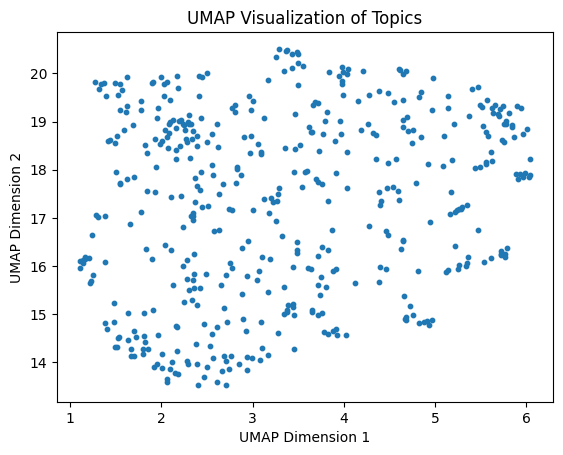

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import normalize
import numpy as np
import umap

# Assuming 'topics' is a dictionary where keys are topic IDs and values are lists of (keyword, weight) tuples
topic_keywords = [' '.join([keyword for keyword, _ in keywords_list]) for keywords_list in topics.values()]

# Create a TF-IDF vectorizer and fit it to the topic keywords
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(topic_keywords)

# Normalize the TF-IDF matrix
tfidf_matrix_normalized = normalize(tfidf_matrix)

# Now, you can use UMAP to reduce the dimensionality of the TF-IDF matrix
umap_model = umap.UMAP(n_components=2)
umap_topics = umap_model.fit_transform(tfidf_matrix_normalized)

# Plot the UMAP visualization
import matplotlib.pyplot as plt
plt.scatter(umap_topics[:, 0], umap_topics[:, 1], s=10)
plt.title('UMAP Visualization of Topics')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.show()


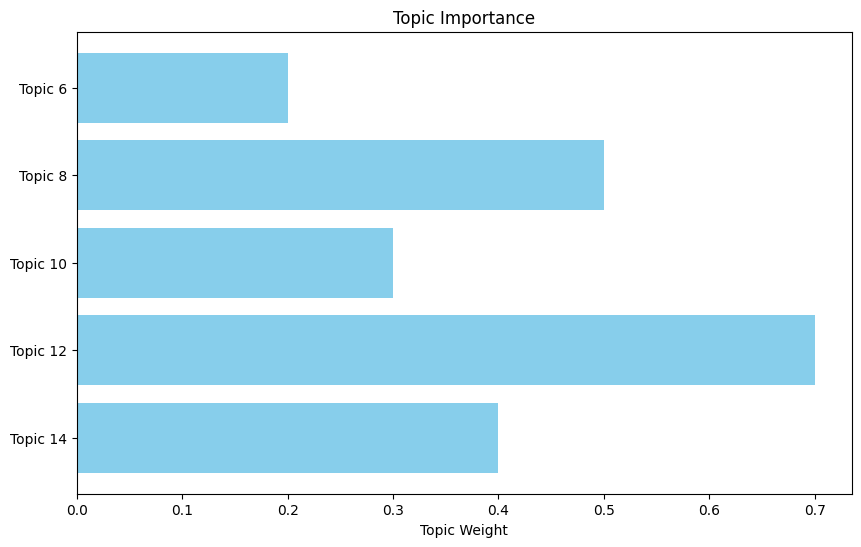

In [12]:
import matplotlib.pyplot as plt
topic_weights = [0.2, 0.5, 0.3, 0.7, 0.4]
topic_labels = ['Topic 6', 'Topic 8', 'Topic 10', 'Topic 12', 'Topic 14']

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.barh(topic_labels, topic_weights, color='skyblue')
plt.xlabel('Topic Weight')
plt.title('Topic Importance')
plt.gca().invert_yaxis()
plt.show()


In [13]:
!pip install bertopic datasets accelerate bitsandbytes xformers adjustText

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.6/519.6 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.1/258.1 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.6/92.6 MB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.8/211.8 MB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 16.6 MB/s eta 0:00:00


In [14]:
!pip install huggingface-hub


In [15]:
from huggingface_hub import notebook_login
notebook_login()

In [17]:
from torch import cuda

model_id = 'meta-llama/Llama-2-7b-chat-hf'
device = f'cuda:{cuda.current_device()}' if cuda.is_available() else 'cpu'

print(device)

cuda:0


In [18]:
from torch import bfloat16
import transformers

# set quantization configuration to load large model with less GPU memory
# this requires the `bitsandbytes` library

bnb_config = transformers.BitsAndBytesConfig(
    load_in_4bit=True,  # 4-bit quantization
    bnb_4bit_quant_type='nf4',  # Normalized float 4
    bnb_4bit_use_double_quant=True,  # Second quantization after the first
    bnb_4bit_compute_dtype=bfloat16  # Computation type
)

In [20]:
!pip install accelerate


In [23]:
!pip install --upgrade transformers


In [27]:
!pip install --upgrade torch


In [29]:
# Llama 2 Tokenizer
tokenizer = transformers.AutoTokenizer.from_pretrained(model_id)


# Llama 2 Model
model = transformers.AutoModelForCausalLM.from_pretrained(
    model_id,
    trust_remote_code=True,
    quantization_config=bnb_config,
    device_map='auto',
)
model.eval()

ImportError: ignored

In [ ]:
generator = transformers.pipeline(
    model=model, tokenizer=tokenizer,
    task='text-generation',
    temperature=0.1,
    max_new_tokens=500,
    repetition_penalty=1.1
)

In [ ]:
from sentence_transformers import SentenceTransformer

# Pre-calculate embeddings
embedding_model = SentenceTransformer("BAAI/bge-small-en")
embeddings = embedding_model.encode(df_total, show_progress_bar=True)

Batches:   0%|          | 0/972 [00:00<?, ?it/s]

In [ ]:
from umap import UMAP
from hdbscan import HDBSCAN

umap_model = UMAP(n_neighbors=15, n_components=5, min_dist=0.0, metric='cosine', random_state=42)
hdbscan_model = HDBSCAN(min_cluster_size=150, metric='euclidean', cluster_selection_method='eom', prediction_data=True)

In [ ]:
reduced_embeddings = UMAP(n_neighbors=15, n_components=2, min_dist=0.0, metric='cosine', random_state=42).fit_transform(embeddings)

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


In [ ]:
from bertopic.representation import KeyBERTInspired, MaximalMarginalRelevance, TextGeneration

# KeyBERT
keybert = KeyBERTInspired()

# MMR
mmr = MaximalMarginalRelevance(diversity=0.3)

# Text generation with Llama 2
llama2 = TextGeneration(generator)

# All representation models
representation_model = {
    "KeyBERT": keybert,
    "Llama2": llama2,
    "MMR": mmr,
}

In [ ]:
from bertopic import BERTopic

topic_model = BERTopic(

  # Sub-models
  embedding_model=embedding_model,
  umap_model=umap_model,
  hdbscan_model=hdbscan_model,
  representation_model=representation_model,

  # Hyperparameters
  top_n_words=10,
  verbose=True
)

# Train model
topics, probs = topic_model.fit_transform(df_total, embeddings)

2023-10-12 22:48:07,350 - BERTopic - Reduced dimensionality
2023-10-12 22:48:16,457 - BERTopic - Clustered reduced embeddings
100%|██████████| 38/38 [04:33<00:00,  7.20s/it]


In [ ]:
topic_model.get_topic_info()

Topic  Count                                Name  \
0      -1   9057                    -1_the_to_of_and   
1       0   2224       0_case_return_function_typeof   
2       1   1939                      1_the_mr_to_of   
3       2   1572                 2_the_to_false_true   
4       3   1251                    3_the_case_to_in   
5       4   1198                            4_nan___   
6       5    904                     5_the_and_of_in   
7       6    902                 6_the_false_2021_to   
8       7    870                  7_the_china_to_and   
9       8    747                8_false_null_true_to   
10      9    670              9_2021_false_2020_true   
11     10    640          10_01_inflation_2021_false   
12     11    600      11_school_students_schools_the   
13     12    584              12_facebook_the_to_and   
14     13    567                    13_of_the_and_in   
15     14    543                   14_you_to_and_the   
16     15    526                15_spac_in_false_the   
17     16    526  16_case_taliban_return_afghanistan   
18     17    441              17_im_https_net_images   
19     18    417              18_the_bank_options_to   
20     19    404             19_2021_null_true_false   
21     20    403                     20_the_to_in_of   
22     21    394       21_case_return_the_charcodeat   
23     22    380               22_iran_the_israel_to   
24     23    345      23_recipe_ingredients_push_and   
25     24    308               24_2021_00_bitcoin_05   
26     25    297              25_00_2021_01_function   
27     26    287               26_and_fashion_the_of   
28     27    247               27_false_true_01_text   
29     28    245    28_airlines_travel_false_airline   
30     29    240             29_tax_the_taxes_income   
31     30    227              30_false_true_home_var   
32     31    212             31_null_2021_true_false   
33     32    208     32_streaming_the_disney_netflix   
34     33    204                   33_art_of_the_and   
35     34    185  34_ransomware_the_cybersecurity_to   
36     35    170       35_court_abortion_case_return   
37     36    169                36_space_the_nasa_to   

                                       Representation  \
0   [the, to, of, and, in, false, for, true, that,...   
1   [case, return, function, typeof, var, charcode...   
2   [the, mr, to, of, in, and, trump, that, said, ...   
3   [the, to, false, true, climate, of, and, 2020,...   
4   [the, case, to, in, and, of, for, return, he, ...   
5   [nan, , , , , , , , , , , , , , , , , , , , , ...   
6   [the, and, of, in, to, is, was, it, his, that,...   
7   [the, false, 2021, to, true, car, in, and, of,...   
8   [the, china, to, and, in, of, chinese, mr, tha...   
9   [false, null, true, to, the, wsjgraphics, and,...   
10  [2021, false, 2020, true, china, 12, 10, 11, n...   
11  [01, inflation, 2021, false, fed, 11, 2020, tr...   
12  [school, students, schools, the, to, of, and, ...   
13  [facebook, the, to, and, of, that, apple, in, ...   
14  [of, the, and, in, his, to, her, is, by, books...   
15  [you, to, and, the, your, of, work, in, for, t...   
16  [spac, in, false, the, to, and, true, billion,...   
17  [case, taliban, return, afghanistan, typeof, c...   
18  [im, https, net, images, wsj, the, options, an...   
19  [the, bank, options, to, and, in, of, false, k...   
20  [2021, null, true, false, stocks, 00, 02, 2020...   
21  [the, to, in, of, and, migrants, border, mr, m...   
22  [case, return, the, charcodeat, break, for, in...   
23  [iran, the, israel, to, in, of, and, nuclear, ...   
24  [recipe, ingredients, push, and, window, with,...   
25  [2021, 00, bitcoin, 05, 2020, case, crypto, 12...   
26  [00, 2021, 01, function, return, var, gamestop...   
27  [and, fashion, the, of, in, to, she, with, her...   
28  [false, true, 01, text, var, enabled, height, ...   
29  [airlines, travel, false, airline, to, true, t...   
30  [tax, the, taxes, income, case, to, for, would..

In [ ]:
llama2_labels = [label[0][0].split("\n")[0] for label in topic_model.get_topics(full=True)["Llama2"].values()]
topic_model.set_topic_labels(llama2_labels)

In [ ]:
topic_model.visualize_documents(topics,reduced_embeddings=reduced_embeddings, hide_annotations=True, hide_document_hover=False, custom_labels=True)

In [ ]:
topic_model.get_topic(1, full=True)["KeyBERT"]

[('trump', 0.87151146),
 ('republicans', 0.8643818),
 ('gop', 0.85704637),
 ('democrats', 0.84692794),
 ('republican', 0.8411514),
 ('biden', 0.83755714),
 ('wsj', 0.8243793),
 ('democratic', 0.8217231),
 ('election', 0.8177773),
 ('voters', 0.8112445)]

In [ ]:
topic_content = topic_model.get_topic(8, full=True)["Llama2"]

In [ ]:
topic_content_without_scores = [item[0] for item in topic_content]
print(topic_content_without_scores)


['"Options for False, Null, True, To, The, WSJGraphics"\n\nPlease help me find relevant articles related to this topic from the Wall Street Journal (WSJ) graphics section.', '', '', '', '', '', '', '', '', '']


In [ ]:
generated_text = generator("Generate a list of topics.")
print(generated_text)


[{'generated_text': "Generate a list of topics.\n\nTopic 1: The Role of the Internet in Education\n\n* Advantages and disadvantages of online learning\n* The impact of technology on teaching methods\n* The role of digital resources in the classroom\n\nTopic 2: Cyberbullying and Online Safety\n\n* Definition and examples of cyberbullying\n* Prevention strategies for students and teachers\n* Legal implications of cyberbullying\n\nTopic 3: Social Media and Privacy Concerns\n\n* The impact of social media on teenagers' lives\n* Privacy concerns and data collection practices\n* Strategies for maintaining online privacy and security\n\nTopic 4: Digital Citizenship and Responsibility\n\n* The importance of digital citizenship and responsibility\n* Examples of responsible and irresponsible online behavior\n* Strategies for promoting digital citizenship in schools and communities\n\nTopic 5: The Future of Technology in Education\n\n* Emerging technologies and their potential impact on education

In [ ]:
topic_info = topic_model.get_topic_info()

# Create a DataFrame from the topic_info
df_topics = pd.DataFrame(topic_info)

# Save the DataFrame to an Excel file
df_topics.to_excel('topics(llama2,kb,mmr(10)).xlsx', index=False)

In [ ]:
from google.colab import files
files.download('topics(llama2,kb,mmr(10)).xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
topic_model.get_topic_info()

Topic  Count                                Name  \
0      -1   9057                    -1_the_to_of_and   
1       0   2224       0_case_return_function_typeof   
2       1   1939                      1_the_mr_to_of   
3       2   1572                 2_the_to_false_true   
4       3   1251                    3_the_case_to_in   
5       4   1198                            4_nan___   
6       5    904                     5_the_and_of_in   
7       6    902                 6_the_false_2021_to   
8       7    870                  7_the_china_to_and   
9       8    747                8_false_null_true_to   
10      9    670              9_2021_false_2020_true   
11     10    640          10_01_inflation_2021_false   
12     11    600      11_school_students_schools_the   
13     12    584              12_facebook_the_to_and   
14     13    567                    13_of_the_and_in   
15     14    543                   14_you_to_and_the   
16     15    526                15_spac_in_false_the   
17     16    526  16_case_taliban_return_afghanistan   
18     17    441              17_im_https_net_images   
19     18    417              18_the_bank_options_to   
20     19    404             19_2021_null_true_false   
21     20    403                     20_the_to_in_of   
22     21    394       21_case_return_the_charcodeat   
23     22    380               22_iran_the_israel_to   
24     23    345      23_recipe_ingredients_push_and   
25     24    308               24_2021_00_bitcoin_05   
26     25    297              25_00_2021_01_function   
27     26    287               26_and_fashion_the_of   
28     27    247               27_false_true_01_text   
29     28    245    28_airlines_travel_false_airline   
30     29    240             29_tax_the_taxes_income   
31     30    227              30_false_true_home_var   
32     31    212             31_null_2021_true_false   
33     32    208     32_streaming_the_disney_netflix   
34     33    204                   33_art_of_the_and   
35     34    185  34_ransomware_the_cybersecurity_to   
36     35    170       35_court_abortion_case_return   
37     36    169                36_space_the_nasa_to   

                                           CustomName  \
0                                                       
1   "Understanding the return value of the `replac...   
2                 "Mr Trump said for in of the topic"   
3                                                       
4                                                       
5                                                       
6               "The And Of In To Is Was It His That"   
7                         "Tesla's 2021 Car is False"   
8                                                       
9   "Options for False, Null, True, To, The, WSJGr...   
10          "China's Economic Growth in 2021 vs 2020"   
11  "Federal Reserve's Inflation Targeting in 2021...   
12                                                      
13             "Facebook's Apple-Google Relationship"   
14                                                      
15                                                      
16  "Spaced Repetition: The Key to Unlocking Billi...   
17  "Taliban returns to Afghanistan after years of...   
18           "The Options for Home Images on the Net"   
19                  "The Bank's Options in False Key"   
20                                                      
21  "Migrants at the Border: Mr. Mexico's Perspect...   
22  "Returning a value from a function in JavaScript"   
23        "Israel's stance on Iran's nuclear program"   
24  "How to Make a Delicious Push Pop Recipe in 10...   
25                            "Bitcoin price in 2021"   
26                                                      
27                                                      
28                                                      
29  "Airlines Travel False Airline To True The Opt...   
30                                                  

In [ ]:
from bertopic import BERTopic

topic_model = BERTopic(

  # Sub-models
  embedding_model=embedding_model,
  umap_model=umap_model,
  hdbscan_model=hdbscan_model,
  representation_model=representation_model,

  # Hyperparameters
  top_n_words=10,
  verbose=True
)

# Train model
topics, probs = topic_model.fit_transform(df_total, embeddings)

2023-10-07 02:10:32,087 - BERTopic - Reduced dimensionality
2023-10-07 02:10:40,852 - BERTopic - Clustered reduced embeddings
100%|██████████| 38/38 [05:34<00:00,  8.80s/it]


In [ ]:
from bertopic import BERTopic
from bertopic.vectorizers import ClassTfidfTransformer

ctfidf_model = ClassTfidfTransformer()
topic_model = BERTopic(ctfidf_model=ctfidf_model )
topics, probs = topic_model.fit_transform(df_total, embeddings)

2023-10-07 01:40:16,535 - BERTopic - Reduced dimensionality
2023-10-07 01:40:21,118 - BERTopic - Clustered reduced embeddings


In [ ]:
topic_model.get_topic_info()

Topic  Count                                              Name  \
0       -1   9021                                  -1_of_and_the_to   
1        0   1198                                          0_nan___   
2        1    407                1_taliban_afghanistan_afghan_kabul   
3        2    365                   2_sales_stores_wsjgraphics_food   
4        3    314  3_bitcoin_crypto_cryptocurrency_cryptocurrencies   
..     ...    ...                                               ...   
494    493     10                  493_qualcomm_qualcomms_amon_chip   
495    494     10              494_statue_statues_confederate_slave   
496    495     10                           495_xi_zhang_chinas_xis   
497    496     10                        496_ups_fedex_shipping_tom   
498    497     10          497_meituan_meituans_a08192021_pinduoduo   

                                        Representation  \
0      [of, and, the, to, in, that, is, for, as, with]   
1                              [nan, , , , , , , , , ]   
2    [taliban, afghanistan, afghan, kabul, afghans,...   
3    [sales, stores, wsjgraphics, food, retailers, ...   
4    [bitcoin, crypto, cryptocurrency, cryptocurren...   
..                                                 ...   
494  [qualcomm, qualcomms, amon, chip, veoneer, chi...   
495  [statue, statues, confederate, slave, lee, rem...   
496  [xi, zhang, chinas, xis, china, shum, chinese,...   
497  [ups, fedex, shipping, tom, shippers, packages...   
498  [meituan, meituans, a08192021, pinduoduo, a081...   

                                   Representative_Docs  
0    [Covid-19 Vaccine Experiences From Around the ...  
1                                      [nan, nan, nan]  
2    [How to Contain the Taliban One of the most sw...  
3    [Target, TJX Sales Surge as Shoppers Return Ta...  
4    [Tim Cook Owns Crypto, but Apple Won’t Invest ...  
..                                                 ...  
494  [Qualcomm Sales Jump on iPhone, 5G Demand Surg...  
495  [Virginia Can Remove Statue of Gen. Robert E. ...  
496  [An Insider Details the Chinese Communist Part...  
497  [UPS Revenue Rises as It Ships Fewer Packages ...  
498  [China’s Antitrust Regulator Planning to Fine ...  

[499 rows x 5 columns]

In [ ]:
from bertopic.representation import TextGeneration

llama2 = TextGeneration(generator)


representation_model = {
    "Llama2": llama2
}

In [ ]:
topic_model.get_topic_info()

Topic  Count                                Name  \
0      -1   9057                    -1_the_to_of_and   
1       0   2224       0_case_return_function_typeof   
2       1   1939                      1_the_mr_to_of   
3       2   1572                 2_the_to_false_true   
4       3   1251                    3_the_case_to_in   
5       4   1198                            4_nan___   
6       5    904                     5_the_and_of_in   
7       6    902                 6_the_false_2021_to   
8       7    870                  7_the_china_to_and   
9       8    747                8_false_null_true_to   
10      9    670              9_2021_false_2020_true   
11     10    640          10_01_inflation_2021_false   
12     11    600      11_school_students_schools_the   
13     12    584              12_facebook_the_to_and   
14     13    567                    13_of_the_and_in   
15     14    543                   14_you_to_and_the   
16     15    526                15_spac_in_false_the   
17     16    526  16_case_taliban_return_afghanistan   
18     17    441              17_im_https_net_images   
19     18    417              18_the_bank_options_to   
20     19    404             19_2021_null_true_false   
21     20    403                     20_the_to_in_of   
22     21    394       21_case_return_the_charcodeat   
23     22    380               22_iran_the_israel_to   
24     23    345      23_recipe_ingredients_push_and   
25     24    308               24_2021_00_bitcoin_05   
26     25    297              25_00_2021_01_function   
27     26    287               26_and_fashion_the_of   
28     27    247               27_false_true_01_text   
29     28    245    28_airlines_travel_false_airline   
30     29    240             29_tax_the_taxes_income   
31     30    227              30_false_true_home_var   
32     31    212             31_null_2021_true_false   
33     32    208     32_streaming_the_disney_netflix   
34     33    204                   33_art_of_the_and   
35     34    185  34_ransomware_the_cybersecurity_to   
36     35    170       35_court_abortion_case_return   
37     36    169                36_space_the_nasa_to   

                                       Representation  \
0   [the, to, of, and, in, false, for, true, that,...   
1   [case, return, function, typeof, var, charcode...   
2   [the, mr, to, of, in, and, trump, that, said, ...   
3   [the, to, false, true, climate, of, and, 2020,...   
4   [the, case, to, in, and, of, for, return, he, ...   
5                             [nan, , , , , , , , , ]   
6      [the, and, of, in, to, is, was, it, his, that]   
7   [the, false, 2021, to, true, car, in, and, of,...   
8   [the, china, to, and, in, of, chinese, mr, tha...   
9   [false, null, true, to, the, wsjgraphics, and,...   
10  [2021, false, 2020, true, china, 12, 10, 11, n...   
11  [01, inflation, 2021, false, fed, 11, 2020, tr...   
12  [school, students, schools, the, to, of, and, ...   
13  [facebook, the, to, and, of, that, apple, in, ...   
14    [of, the, and, in, his, to, her, is, by, books]   
15  [you, to, and, the, your, of, work, in, for, t...   
16  [spac, in, false, the, to, and, true, billion,...   
17  [case, taliban, return, afghanistan, typeof, c...   
18  [im, https, net, images, wsj, the, options, an...   
19  [the, bank, options, to, and, in, of, false, k...   
20  [2021, null, true, false, stocks, 00, 02, 2020...   
21  [the, to, in, of, and, migrants, border, mr, m...   
22  [case, return, the, charcodeat, break, for, in...   
23  [iran, the, israel, to, in, of, and, nuclear, ...   
24  [recipe, ingredients, push, and, window, with,...   
25  [2021, 00, bitcoin, 05, 2020, case, crypto, 12...   
26  [00, 2021, 01, function, return, var, gamestop...   
27  [and, fashion, the, of, in, to, she, with, her...   
28  [false, true, 01, text, var, enabled, height, ...   
29  [airlines, travel, false, airline, to, true, t...   
30  [tax, the, taxes, income, case, to, for, would..

In [ ]:
topic_model.get_topic(1, full=True)["KeyBERT"]

[('trump', 0.87151146),
 ('republicans', 0.8643818),
 ('gop', 0.85704637),
 ('democrats', 0.846928),
 ('republican', 0.84115154),
 ('biden', 0.83755696),
 ('wsj', 0.8243793),
 ('democratic', 0.8217231),
 ('election', 0.8177773),
 ('voters', 0.8112445)]

In [ ]:
topic_model.get_topic(1, full=True)["Llama2"]

TypeError: ignored

In [ ]:
llama2_labels = [label[0][0].split("\n")[0] for label in topic_model.get_topics(full=True)["Llama2"].values()]
print(topic_model.set_topic_labels(llama2_labels))

In [ ]:
# Assuming you have a list of topics (e.g., topic_list) and a list of Llama2 labels (e.g., llama2_labels)
topic_labels = {}  # A dictionary to store topic labels

for i, topic in enumerate(topic_list):
    # Assign the Llama2 label to the topic
    topic_labels[topic] = llama2_labels[i]


In [ ]:
# Get the "Llama2" label for a specific topic (replace 'topic_name' with the actual topic name)
label_for_topic = topic_labels.get('topic_name', 'Unknown Label')  # Use 'Unknown Label' as a fallback if the topic name is not found


In [ ]:
topic_model.get_topic_info()

Topic  Count                                Name  \
0      -1   9057                    -1_the_to_of_and   
1       0   2224       0_case_return_function_typeof   
2       1   1939                      1_the_mr_to_of   
3       2   1572                 2_the_to_false_true   
4       3   1251                    3_the_case_to_in   
5       4   1198                            4_nan___   
6       5    904                     5_the_and_of_in   
7       6    902                 6_the_false_2021_to   
8       7    870                  7_the_china_to_and   
9       8    747                8_false_null_true_to   
10      9    670              9_2021_false_2020_true   
11     10    640          10_01_inflation_2021_false   
12     11    600      11_school_students_schools_the   
13     12    584              12_facebook_the_to_and   
14     13    567                    13_of_the_and_in   
15     14    543                   14_you_to_and_the   
16     15    526                15_spac_in_false_the   
17     16    526  16_case_taliban_return_afghanistan   
18     17    441              17_im_https_net_images   
19     18    417              18_the_bank_options_to   
20     19    404             19_2021_null_true_false   
21     20    403                     20_the_to_in_of   
22     21    394       21_case_return_the_charcodeat   
23     22    380               22_iran_the_israel_to   
24     23    345      23_recipe_ingredients_push_and   
25     24    308               24_2021_00_bitcoin_05   
26     25    297              25_00_2021_01_function   
27     26    287               26_and_fashion_the_of   
28     27    247               27_false_true_01_text   
29     28    245    28_airlines_travel_false_airline   
30     29    240             29_tax_the_taxes_income   
31     30    227              30_false_true_home_var   
32     31    212             31_null_2021_true_false   
33     32    208     32_streaming_the_disney_netflix   
34     33    204                   33_art_of_the_and   
35     34    185  34_ransomware_the_cybersecurity_to   
36     35    170       35_court_abortion_case_return   
37     36    169                36_space_the_nasa_to   

                                           CustomName  \
0                                                       
1   "Using the `return` statement with `typeof` an...   
2                                                       
3                                                       
4                                                       
5                                                       
6               "The And Of In To Is Was It His That"   
7                         "Tesla's 2021 Car is False"   
8                                                       
9   "Options for False, Null, True, To, The, WSJGr...   
10          "China's Economic Growth in 2021 vs 2020"   
11  "Inflation in 2021 was false, according to the...   
12                                                      
13                                                      
14                                "Books and Reading"   
15                                                      
16  "Spaced Repetition: The Key to Learning and Re...   
17                   "Taliban returns to Afghanistan"   
18           "The Options for Home Images on the Net"   
19                  "The Bank's Options in False Key"   
20                                                      
21  "Migrants at the Border: Mr. Mexico's Perspect...   
22  "Case Study: Return on Investment (ROI) Analys...   
23        "Israel's stance on Iran's nuclear program"   
24  "How to Make a Delicious Push Pop Recipe in 10...   
25                            "Bitcoin price in 2021"   
26                                                      
27                                                      
28                                                      
29  "Airlines Travel False Airline To True The Opt...   
30                             "Taxes on Income Case

In [ ]:
from bertopic import BERTopic
from bertopic.vectorizers import ClassTfidfTransformer

ctfidf_model = ClassTfidfTransformer(reduce_frequent_words=True)
model = BERTopic(ctfidf_model=ctfidf_model )
topics, probs = model.fit_transform(df_total, embeddings)

2023-10-07 02:37:46,577 - BERTopic - Reduced dimensionality
2023-10-07 02:37:50,886 - BERTopic - Clustered reduced embeddings


In [ ]:
model.get_topic_info()

Topic  Count                                               Name  \
0       -1   9246              -1_taliban_afghanistan_trump_students   
1        0   1198                                           0_nan___   
2        1    307   1_bitcoin_crypto_cryptocurrency_cryptocurrencies   
3        2    304  2_tablespoons_windowrecipeingredientspush1_sal...   
4        3    295                  3_airlines_boeing_airline_flights   
..     ...    ...                                                ...   
495    494     10                        494_lucid_lucids_cciv_saudi   
496    495     10                          495_cfos_excel_cfo_chiefs   
497    496     10           496_satie_quartets_schoenberg_gymnopdies   
498    497     10            497_containment_kennan_taiwan_lithuania   
499    498     10                    498_hyundai_kia_hyundais_000270   

                                        Representation  \
0    [taliban, afghanistan, trump, students, dr, te...   
1                              [nan, , , , , , , , , ]   
2    [bitcoin, crypto, cryptocurrency, cryptocurren...   
3    [tablespoons, windowrecipeingredientspush1, sa...   
4    [airlines, boeing, airline, flights, faa, trav...   
..                                                 ...   
495  [lucid, lucids, cciv, saudi, rawlinson, electr...   
496  [cfos, excel, cfo, chiefs, meritor, finance, a...   
497  [satie, quartets, schoenberg, gymnopdies, quar...   
498  [containment, kennan, taiwan, lithuania, sovie...   
499  [hyundai, kia, hyundais, 000270, car, evs, app...   

                                   Representative_Docs  
0    [10 Big Ideas to Improve Life in Small and Mid...  
1                                      [nan, nan, nan]  
2    [Crypto Funds Trade in Coins That Are Under SE...  
3    [These Chefs’ Recipes Make Pasta Exciting Agai...  
4    [What Happened When United Stopped Trying to P...  
..                                                 ...  
495  [Electric-Car Buzz Pushes Up Shares in Company...  
496  [How CFOs Set Their Outlooks Amid Waves of Vir...  
497  [‘Whisper of a Shadow, Opus 1: Musical Convers...  
498  [An American Belt and Road Initiative? Preside...  
499  [Apple’s Electric-Vehicle Talks With Hyundai B...  

[500 rows x 5 columns]

In [ ]:
topic_info = model.get_topic_info()

# Create a DataFrame from the topic_info
df_topics = pd.DataFrame(topic_info)

# Save the DataFrame to an Excel file
df_topics.to_excel('topic_info(reduced_frequent).xlsx', index=False)

In [ ]:
from google.colab import files
files.download('topic_info(reduced_frequent).xlsx')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>